In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from collections import Counter
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn import preprocessing

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

## Data Wrangling and Visualization

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Missing Values

In [3]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

### Data Wrangling

In [4]:
# as salary is ordinal values replace with with ordinal numerical values
df.salary.replace(['low', 'medium', 'high'],[0,1,2], inplace = True)

# sales department is replaced by one-hot-encoding
df = df.join(pd.get_dummies(df.sales,prefix='sales'))
df.drop('sales',axis=1,inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
salary                     int64
sales_IT                   uint8
sales_RandD                uint8
sales_accounting           uint8
sales_hr                   uint8
sales_management           uint8
sales_marketing            uint8
sales_product_mng          uint8
sales_sales                uint8
sales_support              uint8
sales_technical            uint8
dtype: object

### Data Statistics

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Visualizations

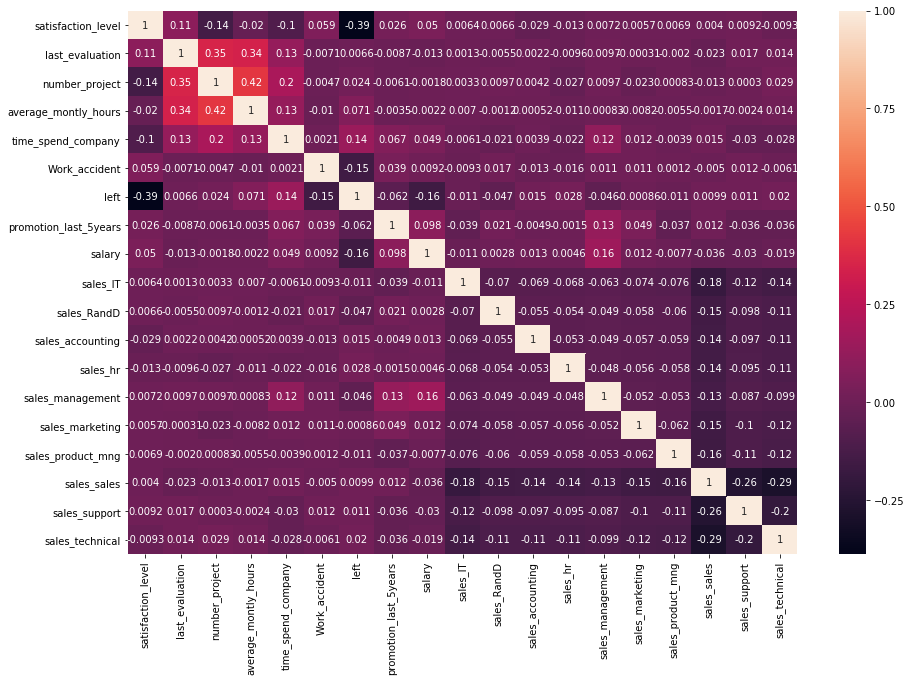

In [7]:
# correlation for entire dataset
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


- **Not much correlation found in between the features**
- **None of the features are highly correlated on the target variable**

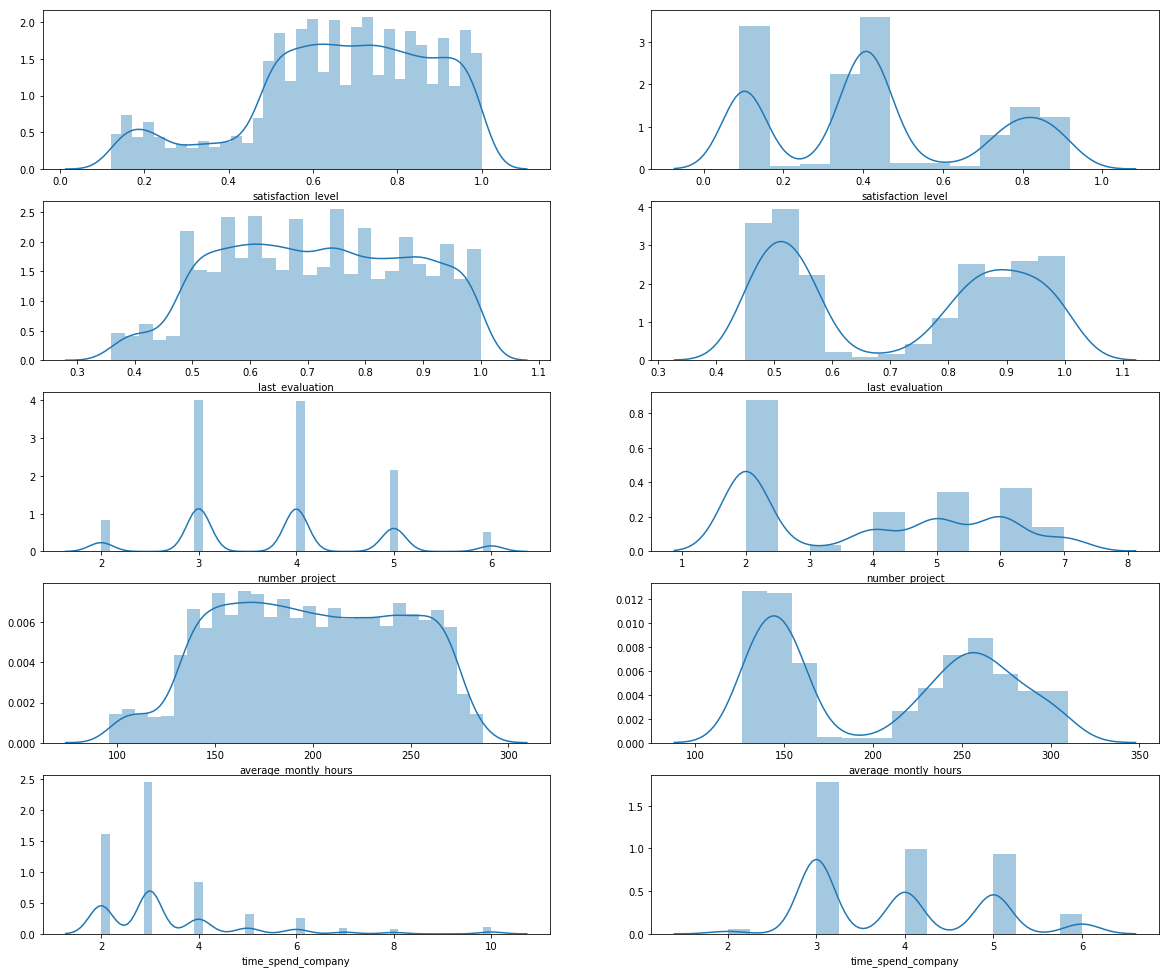

In [8]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(20,17))
leftdf = df[df.left == 1]
notleftdf = df[df.left == 0]

n =521

for column in ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']:
    sns.distplot(notleftdf[column],ax = fig.add_subplot(n))
    n += 1
    if n <= 529:
        sns.distplot(leftdf[column],ax = fig.add_subplot(n))
        n += 1
    else:
        sns.distplot(leftdf[column],ax = fig.add_subplot(5,2,10))

- **Features number_project, average_montly_hours, time_spend_company, salary needs to be scaled with MinMaxScaler to keep the values in between 0 and 1 (as other values are also in between 0 and 1)**

- **People who did not leave have most of the satisfaction levels more than 0.5 while those who left have the satisfaction levels of 0.2/0.5/0.8**
- **People who left have time_spend_company less than 7 but those who did not leave have worked for 7 to 10 also**

In [9]:
for column in ['number_project','average_montly_hours','time_spend_company','salary']:
    df[column] = MinMaxScaler().fit_transform(df[column].as_matrix().reshape(-1,1))

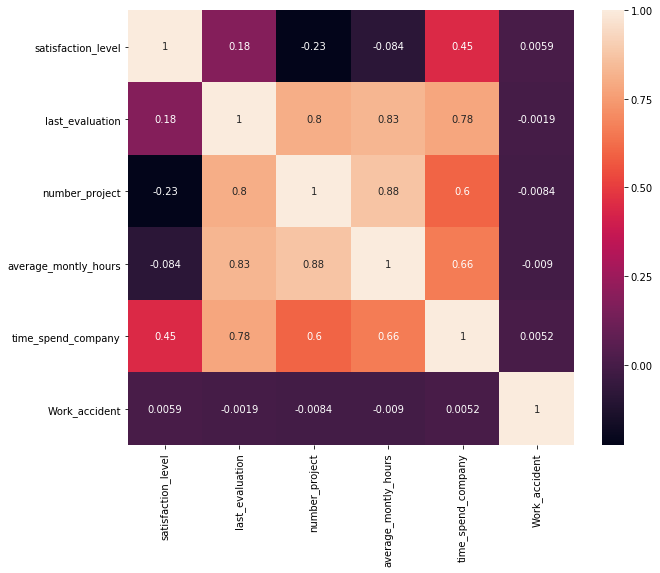

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(annot=True, data=leftdf[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident',]].corr())

[]

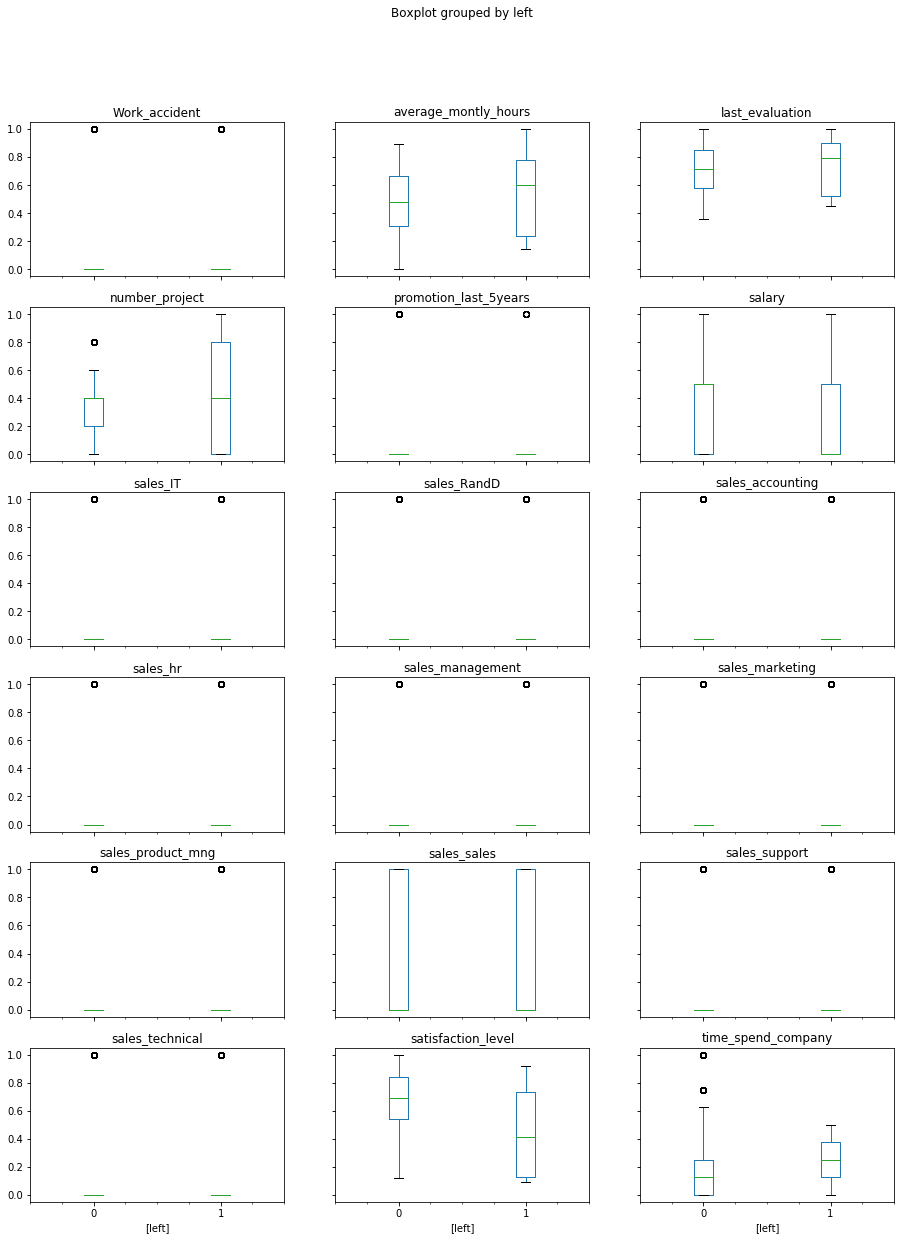

In [11]:
df.boxplot(by='left',figsize=(15,20),grid=False,layout = (6,3))
plt.plot()

### Visualizing the Decision Tree for data analysis

In [12]:
# from sklearn import tree
# from scipy import misc
# import pydotplus
# import graphviz

# clftree = DecisionTreeClassifier(max_depth=3)
# clftree.fit(df_X_train,df_y_train)

# def show_tree(decisionTree, file_path):
#     tree.export_graphviz(decisionTree, out_file='tree.dot',feature_names=df_X_train.columns)
#     graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
#     graph.write_png('tree.png')
#     i = misc.imread(file_path)
    
#     fig, ax = plt.subplots(figsize=(18, 10))    
#     ax.imshow(i, aspect='auto')

# # To use it
# show_tree(clftree, 'tree.png')

## Modeling

In [13]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    CatBoostClassifier(iterations=100,verbose=0),
    XGBClassifier(),
    ExtraTreesClassifier(n_jobs=-1)]

### 80% - 20% HOV

In [14]:
x_cols = list(df.columns.values)
x_cols.remove('left')
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[x_cols], df['left'], test_size=0.2, random_state=27)

In [15]:
for classifier in classifiers:
    classifier.fit(df_X_train,df_y_train)
    print(classifier.__class__.__name__,classifier.score(df_X_test,df_y_test))

KNeighborsClassifier 0.9546666666666667
SVC 0.7753333333333333
DecisionTreeClassifier 0.9783333333333334
RandomForestClassifier 0.99
AdaBoostClassifier 0.9626666666666667
CatBoostClassifier 0.9833333333333333
XGBClassifier 0.979
ExtraTreesClassifier 0.99


**Random Forest gives best prediction results with 98.8% accuracy**

### 5 Cross Fold Validation

In [16]:
df= df.sample(frac=1).reset_index(drop=True)
df_X = df[x_cols]
df_y = df['left']

In [17]:
for classifier in classifiers:
    print(classifier.__class__.__name__, np.array(cross_val_score(classifier, df_X, df_y, cv=5)).mean())

KNeighborsClassifier 0.9503961301032737
SVC 0.7619174730130526
DecisionTreeClassifier 0.976931820873906
RandomForestClassifier 0.9888658214962025
AdaBoostClassifier 0.9587969750367009
CatBoostClassifier 0.9787316653257406
XGBClassifier 0.9754647317108962
ExtraTreesClassifier 0.9874656214295137


**Still Random Forest gives best prediction accuracy of 98.83%**

## Deep Learning

In [18]:
# Keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPool1D

In [19]:
def plot_history(history):
  #  "Accuracy"
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [20]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim = df_X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"],)
history = model.fit(df_X_train, df_y_train, validation_split=0.2, epochs=300, batch_size = 15000, verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


Training Accuracy: 0.9827
Testing Accuracy:  0.9723


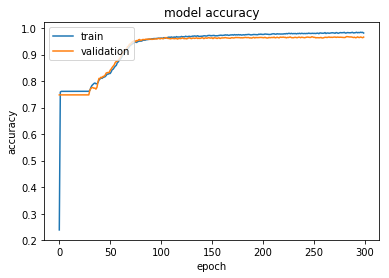

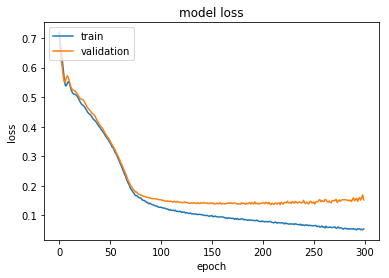

In [21]:
loss, accuracy = model.evaluate(df_X_train, df_y_train.values, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(df_X_test, df_y_test.values, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

#### Learning Rate = 0.01

In [22]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = df_X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-3, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
history = model.fit(df_X_train, df_y_train, validation_split=0.2, epochs=300, batch_size = 15000, verbose=0)

Training Accuracy: 0.9810
Testing Accuracy:  0.9740


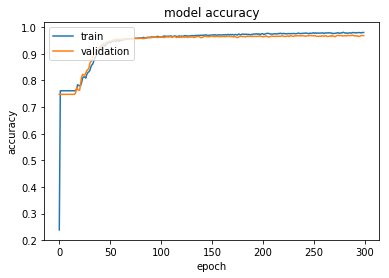

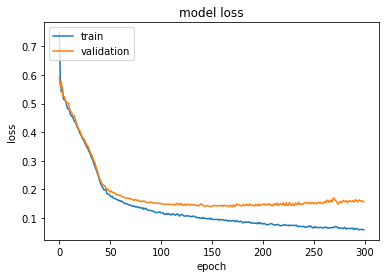

In [23]:
loss, accuracy = model.evaluate(df_X_train, df_y_train.values, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(df_X_test, df_y_test.values, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

#### Learning Rate = 0.001

In [24]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = df_X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-3, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
history = model.fit(df_X_train, df_y_train, validation_split=0.2, epochs=300, batch_size = 15000, verbose=0)

Training Accuracy: 0.9706
Testing Accuracy:  0.9687


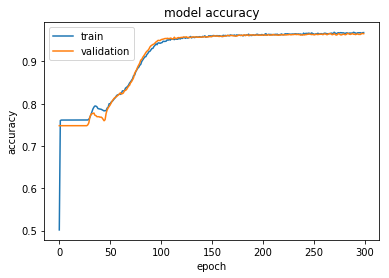

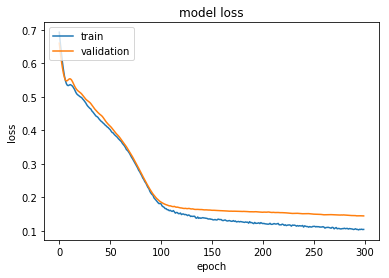

In [25]:
loss, accuracy = model.evaluate(df_X_train, df_y_train.values, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(df_X_test, df_y_test.values, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

#### Learning Rate = 0.0001

In [27]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim = df_X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-7, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
history = model.fit(df_X_train, df_y_train, validation_split=0.2, epochs=300, batch_size = 15000, verbose=0)

Training Accuracy: 0.9517
Testing Accuracy:  0.9520


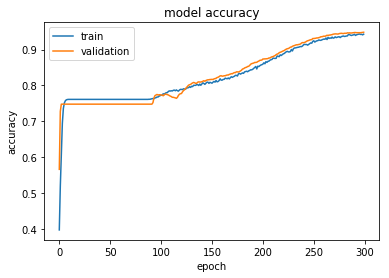

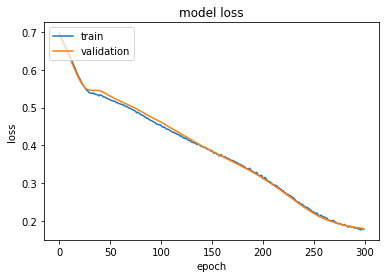

In [28]:
loss, accuracy = model.evaluate(df_X_train, df_y_train.values, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(df_X_test, df_y_test.values, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

#### Learning Rate = 0.01 with more layers

In [29]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_dim = df_X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-4, amsgrad=True)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
history = model.fit(df_X_train, df_y_train, validation_split=0.2, epochs=300, batch_size = 15000, verbose=0)

Training Accuracy: 0.9823
Testing Accuracy:  0.9710


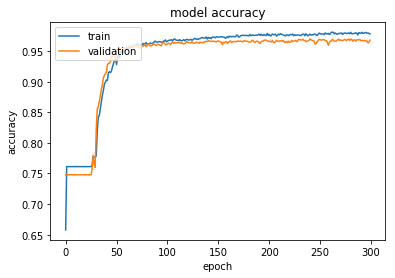

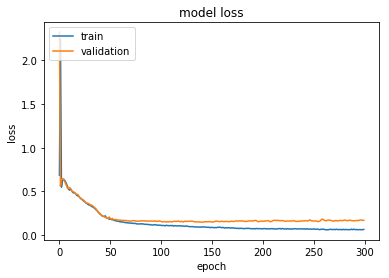

In [30]:
loss, accuracy = model.evaluate(df_X_train, df_y_train.values, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(df_X_test, df_y_test.values, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

**Best Accuracy obtained in Deep Learning models is with less hidden layers and learning rate 0.1, decay of 1e-4 with *97.40% accuracy***